# Import Lib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas

# Data Cleansing

In [2]:
df_price = pd.read_csv('C:\\Users\\lzh-a\\Desktop\\DA\\melb_data.csv')

In [3]:
df_price.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [4]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [5]:
df_price.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [6]:
df_price.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [7]:
df_price['Date'] = pd.to_datetime(df_price['Date'], format = '%d/%m/%Y')

In [8]:
df_price.fillna('Unknown', inplace = True)

In [9]:
df_price

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-12-03,2.5,3067.0,...,1.0,1.0,202.0,Unknown,Unknown,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-02-04,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-03-04,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-03-04,2.5,3067.0,...,2.0,1.0,94.0,Unknown,Unknown,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-06-04,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,2017-08-26,16.7,3150.0,...,2.0,2.0,652.0,Unknown,1981.0,Unknown,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,2017-08-26,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,Unknown,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,2017-08-26,6.8,3016.0,...,2.0,4.0,436.0,Unknown,1997.0,Unknown,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,2017-08-26,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,Unknown,-37.85908,144.89299,Western Metropolitan,6380.0


In [10]:
df_price.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [11]:
df_price['Suburb'] = df_price['Suburb'].str.upper()

In [12]:
df_price

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,ABBOTSFORD,85 Turner St,2,h,1480000.0,S,Biggin,2016-12-03,2.5,3067.0,...,1.0,1.0,202.0,Unknown,Unknown,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,ABBOTSFORD,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-02-04,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,ABBOTSFORD,5 Charles St,3,h,1465000.0,SP,Biggin,2017-03-04,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,ABBOTSFORD,40 Federation La,3,h,850000.0,PI,Biggin,2017-03-04,2.5,3067.0,...,2.0,1.0,94.0,Unknown,Unknown,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,ABBOTSFORD,55a Park St,4,h,1600000.0,VB,Nelson,2016-06-04,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,WHEELERS HILL,12 Strada Cr,4,h,1245000.0,S,Barry,2017-08-26,16.7,3150.0,...,2.0,2.0,652.0,Unknown,1981.0,Unknown,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,WILLIAMSTOWN,77 Merrett Dr,3,h,1031000.0,SP,Williams,2017-08-26,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,Unknown,-37.85927,144.87904,Western Metropolitan,6380.0
13577,WILLIAMSTOWN,83 Power St,3,h,1170000.0,S,Raine,2017-08-26,6.8,3016.0,...,2.0,4.0,436.0,Unknown,1997.0,Unknown,-37.85274,144.88738,Western Metropolitan,6380.0
13578,WILLIAMSTOWN,96 Verdon St,4,h,2500000.0,PI,Sweeney,2017-08-26,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,Unknown,-37.85908,144.89299,Western Metropolitan,6380.0


In [34]:
df_price_suburb_count = df_price.groupby(['Suburb'])['Address'].count().sort_values(ascending = False).reset_index(name = 'Count')
df_price_suburb_count

,Suburb,Count
0,RESERVOIR,359
1,RICHMOND,260
2,BENTLEIGH EAST,249
3,PRESTON,239
4,BRUNSWICK,222
...,...,...
309,ATTWOOD,1
310,BEACONSFIELD UPPER,1
311,BACCHUS MARSH,1
312,SANDHURST,1


In [31]:
df_price_median = df_price.groupby(['Suburb'])['Price'].agg('median').sort_values(ascending = False).reset_index(name = 'Median')
df_price_median

,Suburb,Median
0,KOOYONG,2185000.0
1,EAGLEMONT,1901000.0
2,ALBERT PARK,1900000.0
3,CANTERBURY,1890000.0
4,MIDDLE PARK,1880000.0
...,...,...
309,MELTON SOUTH,390000.0
310,WALLAN,366000.0
311,KURUNJANG,353500.0
312,ROCKBANK,340000.0


In [47]:
df_price_seller = df_price.groupby(['SellerG', 'Suburb'])['Suburb'].count().sort_values(ascending = False).reset_index(name = 'Count')
df_price_seller

,SellerG,Suburb,Count
0,Biggin,RICHMOND,101
1,Nelson,ESSENDON,97
2,Nelson,BRUNSWICK,96
3,Barry,RESERVOIR,90
4,Buxton,BENTLEIGH EAST,88
...,...,...,...
2731,Nelson,SURREY HILLS,1
2732,Considine,PASCOE VALE,1
2733,Nelson,SEDDON,1
2734,Coventry,HEIDELBERG HEIGHTS,1


In [54]:
df_price_land = df_price.groupby(['Suburb'])['Landsize'].agg('mean').sort_values(ascending = False).reset_index(name = 'Avgsize')
df_price_land

,Suburb,Avgsize
0,SILVAN,57245.000000
1,NEW GISBORNE,44500.000000
2,GISBORNE,8437.875000
3,FITZROY,7965.508475
4,BULLENGAROOK,4000.000000
...,...,...
309,WEST MELBOURNE,168.258065
310,SOUTH MELBOURNE,164.576471
311,CREMORNE,127.120000
312,WONGA PARK,0.000000


In [56]:
df_price_high = df_price.groupby(['SellerG'])['Price'].agg('max').sort_values(ascending = False).reset_index(name = 'High_price')
df_price_high

,SellerG,High_price
0,Hall,9000000.0
1,Sotheby's,8000000.0
2,Abercromby's,7650000.0
3,Jellis,6500000.0
4,Marshall,6400000.0
...,...,...
263,Oak,380000.0
264,Wood,370000.0
265,hockingstuart/Village,345000.0
266,hockingstuart/Advantage,330000.0


In [69]:
df_price_sub_land = df_price.groupby(['Suburb']).agg({'Price':'median', 'Landsize':'mean'}).sort_values(by = ['Price', 'Landsize'], ascending = False).reset_index()
df_price_sub_land

,Suburb,Price,Landsize
0,KOOYONG,2185000.0,310.000000
1,EAGLEMONT,1901000.0,802.521739
2,ALBERT PARK,1900000.0,176.652174
3,CANTERBURY,1890000.0,702.666667
4,MIDDLE PARK,1880000.0,209.941176
...,...,...,...
309,MELTON SOUTH,390000.0,601.888889
310,WALLAN,366000.0,502.000000
311,KURUNJANG,353500.0,656.750000
312,ROCKBANK,340000.0,609.000000


In [71]:
df_price_seller_price = df_price.groupby(['SellerG'])['Price'].agg('max').sort_values(ascending = False).reset_index(name = 'high_price')
df_price_seller_price

,SellerG,high_price
0,Hall,9000000.0
1,Sotheby's,8000000.0
2,Abercromby's,7650000.0
3,Jellis,6500000.0
4,Marshall,6400000.0
...,...,...
263,Oak,380000.0
264,Wood,370000.0
265,hockingstuart/Village,345000.0
266,hockingstuart/Advantage,330000.0


In [80]:
df_price_type = df_price.groupby(['Type'])['Suburb'].count().reset_index(name = 'Count')
df_price_type

,Type,Count
0,h,9449
1,t,1114
2,u,3017


In [15]:
location = geopandas.read_file('C:\\Users\\lzh-a\\Desktop\\SourceCode\\suburb-10-vic.geojson')

In [16]:
location

,id,lc_ply_pid,dt_create,dt_retire,loc_pid,vic_locali,vic_loca_1,vic_loca_2,vic_loca_3,vic_loca_4,vic_loca_5,vic_loca_6,vic_loca_7,geometry
0,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.1,6670,2011-08-31,None,VIC2615,2012-04-27,None,UNDERBOOL,None,None,G,None,2,"POLYGON ((141.74552 -35.07229, 141.74552 -35.0..."
1,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.2,6671,2011-08-31,None,VIC1986,2012-04-27,None,NURRAN,None,None,G,None,2,"POLYGON ((148.66877 -37.39571, 148.66767 -37.3..."
2,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.3,6672,2011-08-31,None,VIC2862,2012-04-27,None,WOORNDOO,None,None,G,None,2,"POLYGON ((142.92288 -37.97886, 142.85448 -37.9..."
3,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.4,6673,2011-08-31,None,VIC734,2017-08-09,None,DEPTFORD,None,None,G,None,2,"POLYGON ((147.82336 -37.66001, 147.72499 -37.6..."
4,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.5,6674,2011-08-31,None,VIC2900,2012-04-27,None,YANAC,None,None,G,None,2,"POLYGON ((141.27978 -35.99859, 141.28480 -35.9..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2968,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.2969,10667,2017-06-02,None,VIC1635,2017-08-09,None,MELBOURNE AIRPORT,None,None,G,None,2,"POLYGON ((144.86758 -37.67103, 144.86630 -37.6..."
2969,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.2970,10666,2017-06-02,None,VIC381,2017-08-09,None,BULLA,None,None,G,None,2,"POLYGON ((144.80472 -37.66949, 144.80353 -37.6..."
2970,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.2971,10688,2017-06-02,None,VIC2308,2017-08-09,None,SOMERS,None,None,G,None,2,"POLYGON ((145.19240 -38.40087, 145.18947 -38.4..."
2971,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.2972,10687,2017-06-02,None,VIC1187,2017-08-09,None,HMAS CERBERUS,None,None,G,None,2,"POLYGON ((145.19240 -38.40087, 145.19624 -38.3..."


<AxesSubplot:>

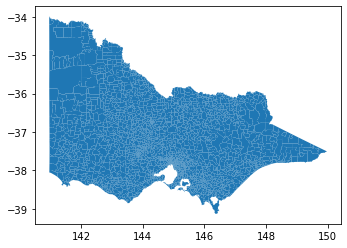

In [17]:
location.plot()

In [18]:
location.rename(columns = {'vic_loca_2':'Suburb'})

,id,lc_ply_pid,dt_create,dt_retire,loc_pid,vic_locali,vic_loca_1,Suburb,vic_loca_3,vic_loca_4,vic_loca_5,vic_loca_6,vic_loca_7,geometry
0,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.1,6670,2011-08-31,None,VIC2615,2012-04-27,None,UNDERBOOL,None,None,G,None,2,"POLYGON ((141.74552 -35.07229, 141.74552 -35.0..."
1,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.2,6671,2011-08-31,None,VIC1986,2012-04-27,None,NURRAN,None,None,G,None,2,"POLYGON ((148.66877 -37.39571, 148.66767 -37.3..."
2,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.3,6672,2011-08-31,None,VIC2862,2012-04-27,None,WOORNDOO,None,None,G,None,2,"POLYGON ((142.92288 -37.97886, 142.85448 -37.9..."
3,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.4,6673,2011-08-31,None,VIC734,2017-08-09,None,DEPTFORD,None,None,G,None,2,"POLYGON ((147.82336 -37.66001, 147.72499 -37.6..."
4,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.5,6674,2011-08-31,None,VIC2900,2012-04-27,None,YANAC,None,None,G,None,2,"POLYGON ((141.27978 -35.99859, 141.28480 -35.9..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2968,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.2969,10667,2017-06-02,None,VIC1635,2017-08-09,None,MELBOURNE AIRPORT,None,None,G,None,2,"POLYGON ((144.86758 -37.67103, 144.86630 -37.6..."
2969,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.2970,10666,2017-06-02,None,VIC381,2017-08-09,None,BULLA,None,None,G,None,2,"POLYGON ((144.80472 -37.66949, 144.80353 -37.6..."
2970,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.2971,10688,2017-06-02,None,VIC2308,2017-08-09,None,SOMERS,None,None,G,None,2,"POLYGON ((145.19240 -38.40087, 145.18947 -38.4..."
2971,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.2972,10687,2017-06-02,None,VIC1187,2017-08-09,None,HMAS CERBERUS,None,None,G,None,2,"POLYGON ((145.19240 -38.40087, 145.19624 -38.3..."


In [77]:
loc_join = location.merge(df_price_suburb_count, on = 'Suburb')
loc_join

KeyError: 'Suburb'

# Data Visualization

## 1. Suburb findings 

### 1.1 Top 10 listing suburbs

Text(0.5, 0, 'Count')

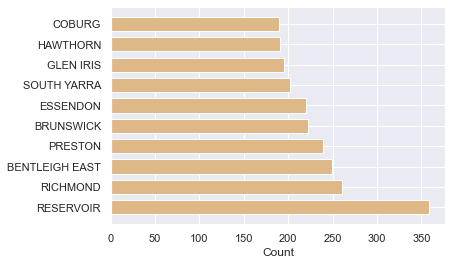

In [44]:
plt.barh(df_price_suburb_count['Suburb'][:10], df_price_suburb_count['Count'][:10], height = 0.7, color = 'burlywood')
plt.xlabel('Count')

### 1.2 Top 10 expensice suburbs

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

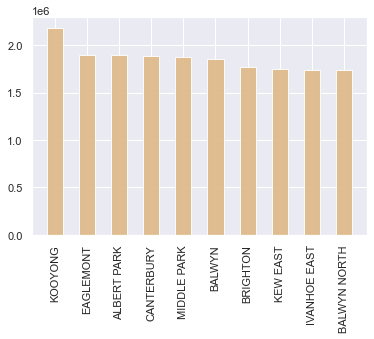

In [50]:
plt.bar(df_price_median['Suburb'][:10], df_price_median['Median'][:10], alpha = 0.9, width = 0.5, color = 'burlywood')
plt.xticks(rotation = 90)

### 1.3 Top 10 suburbs landsize

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

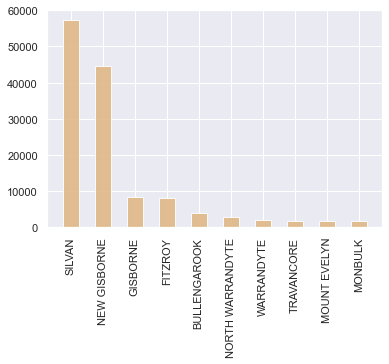

In [53]:
plt.bar(df_price_land['Suburb'][:10], df_price_land['Avgsize'][:10], alpha = 0.9, width = 0.5, color = 'burlywood')
plt.xticks(rotation = 90)

## 2. Price findings

### 2.1 Median price distribution

<AxesSubplot:xlabel='Median', ylabel='Count'>

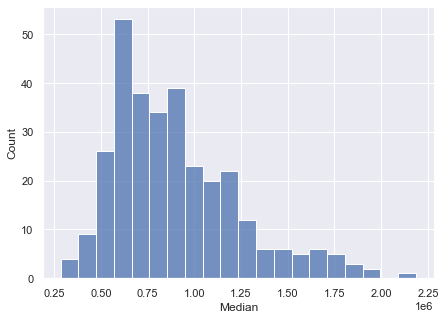

In [49]:
sns.set_theme(style = 'darkgrid')
fig, axs = plt.subplots(figsize = (7,5))
sns.histplot(df_price_median['Median'], palette = 'light:m_r', bins = 20)

### 2.2 Median price to average landsize

<AxesSubplot:xlabel='Price', ylabel='Landsize'>

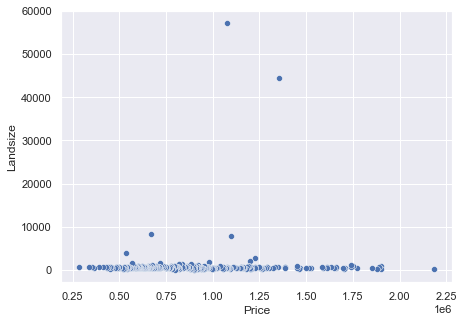

In [68]:
fig, axs = plt.subplots(figsize = (7,5))
sns.scatterplot(x = df_price_sub_land['Price'], y = df_price_sub_land['Landsize'])

### 2.3 Top 10 Sellers sell highest price

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Hall'),
  Text(1, 0, "Sotheby's"),
  Text(2, 0, "Abercromby's"),
  Text(3, 0, 'Jellis'),
  Text(4, 0, 'Marshall'),
  Text(5, 0, 'Kay'),
  Text(6, 0, 'Castran'),
  Text(7, 0, 'RT'),
  Text(8, 0, 'Caine'),
  Text(9, 0, 'Hodges')])

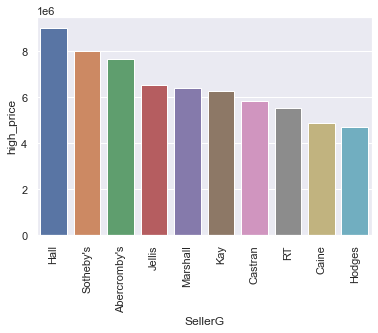

In [76]:
sns.barplot(x = df_price_seller_price['SellerG'][:10], y = df_price_seller_price['high_price'][:10])
plt.xticks(rotation = 90)

## 3 Type findings

### 3.1 Type proportion

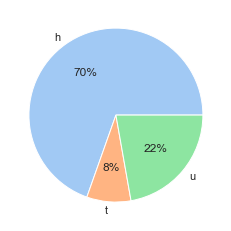

In [84]:
colors = sns.color_palette('pastel')[0:5]
plt.pie(df_price_type['Count'], labels = df_price_type['Type'], colors = colors, autopct = '%1.0f%%')
plt.show()